<a href="https://colab.research.google.com/github/SDGPTeamX/PregRed/blob/ml_umeshika/Pregred_Umeshika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Remove columns with single values**

In [ ]:
# summarize the number of unique values for each column using panda
# define the location of the dataset
path = '/content/TeamX_Modified_Dataset.csv'
# load the dataset
df = pd.read_csv(path)
# summarize the number of unique values in each column
counts = df.nunique()
print(counts)

Age                         32
Gravidity                    7
Consanguinity                2
Rubella Immunization         2
Had Folic Acid               2
Subfertility                 2
Blood Pressure               4
Height                      95
BMI                        219
Cardiac Diseases             2
Thyroid Diseases             2
Renal Diseases               1
Venereal Diseases            1
Malaria                      1
HIV                          1
Blood Sugar                128
Haemoglobin                 70
Is the newborn healthy?      2
dtype: int64


In [ ]:
df

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,No,No,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,No,No,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,No,No,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,No,No,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,No,No,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,No,No,No,No,98.0,11.9,No
2034,23,1,No,Yes,No,No,N,156.5,22.2,No,No,No,No,No,No,100.0,12.0,No
2035,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,No,No,No,No,90.0,11.4,No
2036,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,No,No,No,No,101.0,12.8,No


In [ ]:
# delete columns with a single unique value
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(df.columns[to_del], axis=1, inplace=True)
print(df.shape)

[11, 12, 13, 14]
(2038, 14)


In [ ]:
df

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,98.0,11.9,No
2034,23,1,No,Yes,No,No,N,156.5,22.2,No,No,100.0,12.0,No
2035,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,90.0,11.4,No
2036,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,101.0,12.8,No


In [ ]:
df.to_csv('/content/Colabs_Modified_Remove_Single_Values.csv', index=False)

In [ ]:
df2 = pd.read_csv('/content/Colabs_Modified_Remove_Single_Values.csv')
df2

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,98.0,11.9,No
2034,23,1,No,Yes,No,No,N,156.5,22.2,No,No,100.0,12.0,No
2035,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,90.0,11.4,No
2036,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,101.0,12.8,No


## **Remove duplicated rows**

In [ ]:
# locate rows of duplicate data
# calculate duplicates
dups = df2.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df2[dups])

True
      Age  Gravidity  ... Haemoglobin Is the newborn healthy?
268    22          1  ...        11.0                     Yes
495    33          1  ...         NaN                      No
553    26          2  ...        11.0                     Yes
702    32          2  ...        13.8                     Yes
709    30          2  ...        11.7                     Yes
720    22          1  ...        11.2                     Yes
756    29          2  ...        12.7                     Yes
1692   35          2  ...        11.9                      No
1735   25          1  ...         NaN                      No
1758   34          1  ...         NaN                      No

[10 rows x 14 columns]


In [ ]:
# delete rows of duplicate data from the dataset
print(df2.shape)
# delete duplicate rows
df2.drop_duplicates(inplace=True)
print(df2.shape)

(2038, 14)
(2028, 14)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028 entries, 0 to 2037
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2028 non-null   int64  
 1   Gravidity                2028 non-null   int64  
 2   Consanguinity            2026 non-null   object 
 3   Rubella Immunization     2025 non-null   object 
 4   Had Folic Acid           2024 non-null   object 
 5   Subfertility             2027 non-null   object 
 6   Blood Pressure           1992 non-null   object 
 7   Height                   1980 non-null   float64
 8   BMI                      1983 non-null   float64
 9   Cardiac Diseases         2028 non-null   object 
 10  Thyroid Diseases         2028 non-null   object 
 11  Blood Sugar              1855 non-null   float64
 12  Haemoglobin              1860 non-null   float64
 13  Is the newborn healthy?  2028 non-null   object 
dtypes: float64(4), int64(2),

In [ ]:
df2.describe()

,Age,Gravidity,Height,BMI,Blood Sugar,Haemoglobin
count,2028.000000,2028.000000,1980.000000,1983.000000,1855.000000,1860.000000
mean,29.058185,2.135602,154.123788,22.456011,95.158383,11.573844
std,5.690294,1.139875,6.004279,4.379197,16.693485,4.365603
min,14.000000,1.000000,69.500000,10.000000,22.000000,7.200000
25%,25.000000,1.000000,150.000000,19.200000,84.000000,10.600000
50%,29.000000,2.000000,154.000000,22.000000,94.000000,11.400000
75%,33.000000,3.000000,158.000000,25.000000,102.000000,12.200000
max,46.000000,7.000000,178.000000,43.500000,196.000000,133.000000


In [ ]:
df2.to_csv('/content/Colabs_Modified_Remove_Duplicated_Rows.csv', index=False)
df3 = pd.read_csv('/content/Colabs_Modified_Remove_Duplicated_Rows.csv')
df3

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,98.0,11.9,No
2024,23,1,No,Yes,No,No,N,156.5,22.2,No,No,100.0,12.0,No
2025,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,90.0,11.4,No
2026,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,101.0,12.8,No


## **Replace missing values**

In [ ]:
df3_mean=df3.mean(axis=0)
print(df3_mean)

Age             29.058185
Gravidity        2.135602
Height         154.123788
BMI             22.456011
Blood Sugar     95.158383
Haemoglobin     11.573844
dtype: float64


In [ ]:
df3 = df3.fillna(df3_mean, axis=0)
df3

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


In [ ]:
df3.to_csv('/content/Colabs_Modified_Replace_Missing_Values.csv', index=False)
df4 = pd.read_csv('/content/Colabs_Modified_Replace_Missing_Values.csv')
df4

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


In [ ]:
df4_mode = df4.mode(axis=0, numeric_only=False, dropna=True)
df4_mode

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,29,1,No,Yes,Yes,No,N,150.0,20.0,No,No,95.158383,11.573844,Yes


In [ ]:
df4_mode = df4.mode(axis=0, numeric_only=False, dropna=True)
print(df4_mode)
df4 = df4.fillna(df4_mode.iloc[0], axis=0)
df4

   Age  Gravidity  ... Haemoglobin Is the newborn healthy?
0   29          1  ...   11.573844                     Yes

[1 rows x 14 columns]


,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


In [ ]:
df4.to_csv('/content/Colabs_PregRed_Cleaned_Dataset.csv', index=False)
df5 = pd.read_csv('/content/Colabs_PregRed_Cleaned_Dataset.csv')
df5

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


## **Correlations of Attributes**

In [3]:
#read normalized dataset
df6 = pd.read_csv('/content/Colabs_PregRed_Normalized_Dataset.csv')
df6

,Age,Gravidity,Consanguinity=Yes,'Rubella Immunization=Yes','Had Folic Acid=Yes',Subfertility=Yes,'Blood Pressure',Height,BMI,'Cardiac Diseases=Yes','Thyroid Diseases=Yes','Blood Sugar',Haemoglobin,'Is the newborn healthy?'
0,0.50000,0.333333,0,0,0,0,0.000000,0.732719,0.400000,0,0,0.649425,0.038156,Yes
1,0.00000,0.000000,0,1,0,0,0.000000,0.824885,0.371689,0,0,0.295977,0.031797,Yes
2,0.31250,0.166667,0,1,1,0,0.000000,0.769585,0.247761,0,0,0.390805,0.022258,Yes
3,0.62500,0.166667,0,1,1,0,0.666667,0.769585,0.250746,0,0,0.420484,0.034778,No
4,0.50000,0.166667,0,1,1,0,0.000000,0.760369,0.250746,0,0,0.390805,0.019873,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,0.25000,0.000000,0,1,1,1,0.000000,0.843318,0.394030,0,0,0.436782,0.037361,No
2024,0.28125,0.000000,0,1,0,0,0.000000,0.801843,0.364179,0,0,0.448276,0.038156,No
2025,0.59375,0.166667,0,1,1,0,0.000000,0.741935,0.405970,0,0,0.390805,0.033386,No
2026,0.37500,0.166667,0,1,1,0,0.000000,0.783410,0.400000,0,0,0.454023,0.044515,No


In [5]:
#getting correlations
df6.corr()

,Age,Gravidity,Consanguinity=Yes,'Rubella Immunization=Yes','Had Folic Acid=Yes',Subfertility=Yes,'Blood Pressure',Height,BMI,'Cardiac Diseases=Yes','Thyroid Diseases=Yes','Blood Sugar',Haemoglobin
Age,1.000000,0.483131,-0.030089,0.032194,0.035844,0.016046,0.089979,-0.114383,0.152665,0.037134,-0.014129,0.105147,-0.019879
Gravidity,0.483131,1.000000,-0.001624,0.036474,-0.148624,-0.040456,0.036900,-0.129073,0.188794,0.044133,-0.031309,0.073011,-0.038690
Consanguinity=Yes,-0.030089,-0.001624,1.000000,0.014940,-0.067588,-0.018711,-0.018970,-0.001707,-0.011735,-0.008587,-0.004041,-0.018938,0.004205
'Rubella Immunization=Yes',0.032194,0.036474,0.014940,1.000000,0.152669,0.013761,-0.029893,-0.009391,0.002295,0.007756,0.003650,0.018677,-0.005150
'Had Folic Acid=Yes',0.035844,-0.148624,-0.067588,0.152669,1.000000,-0.033572,-0.004525,-0.016978,-0.041525,0.023349,0.010988,-0.033210,0.013740
Subfertility=Yes,0.016046,-0.040456,-0.018711,0.013761,-0.033572,1.000000,-0.028462,0.008324,0.064410,-0.017830,-0.008390,0.018546,0.039657
'Blood Pressure',0.089979,0.036900,-0.018970,-0.029893,-0.004525,-0.028462,1.000000,0.004298,0.101326,0.065137,0.026140,0.065680,-0.015132
Height,-0.114383,-0.129073,-0.001707,-0.009391,-0.016978,0.008324,0.004298,1.000000,0.003067,-0.043746,0.007288,-0.024215,0.017243
BMI,0.152665,0.188794,-0.011735,0.002295,-0.041525,0.064410,0.101326,0.003067,1.000000,0.000509,-0.003309,0.158144,0.016482
'Cardiac Diseases=Yes',0.037134,0.044133,-0.008587,0.007756,0.023349,-0.017830,0.065137,-0.043746,0.000509,1.000000,-0.002098,-0.036452,-0.008103


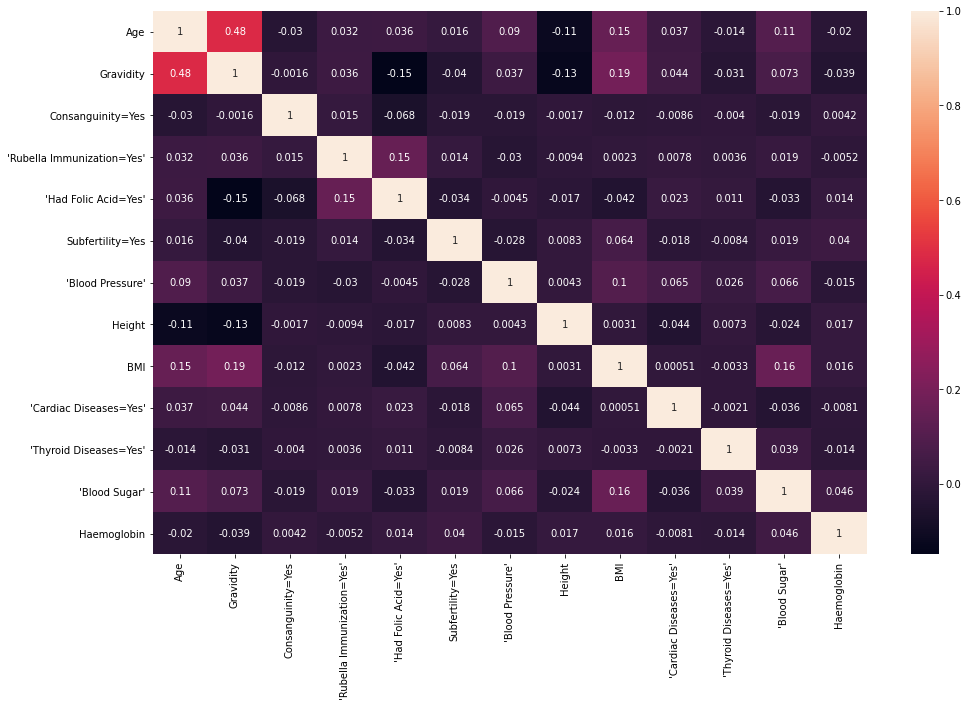

In [11]:
#visualizing the correlations
plt.figure(figsize=(16,10))
sns.heatmap(df6.corr(), annot=True)
plt.show()